In [230]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


import plotly.express as px
from wordcloud import WordCloud


import warnings
warnings.filterwarnings("ignore")

## Dataset Description
We are provided with a data about Disney+ contents and the data are to be explored to get key finding or major trends. Different information about the contents are provided which are:
- Show_Id: Unique identifier for the content
- Type: Type of the content : TV Show or a Movie
- Title: Title of the content
- Director: THe ones who directed the tv show or the movie
- Cast: Main characters from the movie or tv show
- Country: Country of origin for the given content. Can have more than one values
- Date Added: The date when the content was added to disney+
- Release Year: The year when the content was released not necessarily in disney+
- Rating: Content rating which indicates its character: Family Friendly, Inclusion of violence, nudity, etc
- Duration: The timeframe length of the content if its a movie and no of seasons if it is a tv show
- listed in: The different genres it belong to or in which genre it can be found in disney+
- description: A short description about the movie or the tv show

In [527]:
# Import the CSV file, save it in a data frame, and display the top 3 rows
df = pd.read_csv('content.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [5]:
print('Total no. of rows:',df.shape[0])
print('Total no. of columns:',df.shape[1])

Total no. of rows: 8807
Total no. of columns: 12


We have a total of 8807 records of the contents in the disney+. Let's check for the validity of the data whether there are any missing informations or if there are any duplicated records.

In [280]:
# info about the columns and its data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


It is found that the datatype for all of the columns except release_year (int) is object. Some of these columns needs to be reformatted before proceeding further.

In [286]:
# change the datatype for date added to datetime for better analysis
df['date_added'] = df['date_added'].apply(pd.to_datetime)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [288]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Data Validation and Cleansing
Lets check the data for validity. This includes checking the absence of data, no of unique values in data(as a column with only one value is not relevant for analysis) , range of the data (numeric) and presence of duplicate records.

In [44]:
# putting the column names in a list
column_names = df.columns.tolist()
null_count = df.isnull().sum()
null_ratio = round(df.isnull().mean(),3)
nunique = df.nunique()
#display the dataframe with all the information
pd.DataFrame(np.vstack((column_names,null_count,null_ratio, nunique)).T, 
             columns = ['Columns','Null Count','Null Ratio','Unique Values'])

,Columns,Null Count,Null Ratio,Unique Values
0,show_id,0,0.0,8807
1,type,0,0.0,2
2,title,0,0.0,8807
3,director,2634,0.299,4528
4,cast,825,0.094,7692
5,country,831,0.094,748
6,date_added,10,0.001,1767
7,release_year,0,0.0,74
8,rating,4,0.0,17
9,duration,3,0.0,220


In [266]:
# checking presence of duplicate records
df.duplicated().sum()

0

In [641]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

'74 min', '84 min', '66 min' seems to be the invalid data lets see what went wrong

In [644]:
invalid_rating = df[df['rating'].isin(['74 min', '84 min', '66 min'])]
invalid_rating

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


It seems that the duration of the content was recorded in the rating section. Lets fix this

In [663]:
for i,r in invalid_rating.iterrows():
    df['duration'][i] = r.loc['rating']
    df['rating'][i] = np.nan
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [267]:
#check validity in numerical data
df.describe()

,date_added,release_year
count,8797,8807.000000
mean,2019-05-17 05:59:08.436967168,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-02 00:00:00,2017.000000
75%,2020-08-19 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


This can be used to check the range or the distribution of the data and also give initial info about the possible outliers.

## EDA
After validation, the next step would be to explore the data and check for characteristics of the procured dataset using different statistical measures and with the help of visualization using various plots. We will be checking for the distribution of data, how contents are distributed throughout the world, which type of contents are primarily prevalent in the collection, how the trend of contents being added in disney+ throughout the years, etc.

First lets look at the distribution of data.

### Distribution of content type

In [293]:
#Distribution of Type of Contents
type_dist = df['type'].value_counts()
type_dist

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

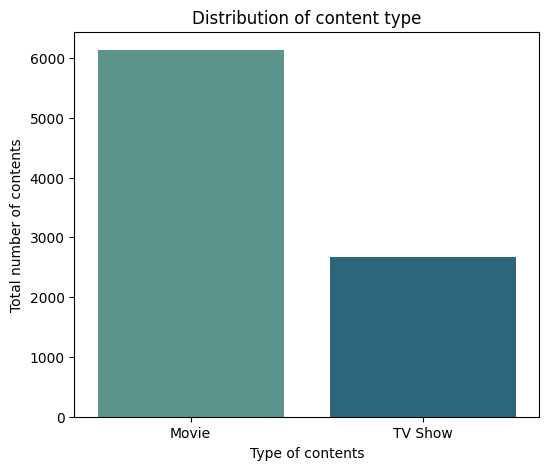

In [294]:
#visualizing the distribution in a barplot
fig = plt.figure(figsize=(6,5)) #setting the figure size
sns.barplot(x = type_dist.index,
                       y = type_dist.values, 
                       palette = 'crest')
plt.xlabel('Type of contents')
plt.ylabel('Total number of contents')
plt.title('Distribution of content type')
plt.show()

### Directors with highest number of contents directed

In [295]:
# Top 20 directors for the contents
top20_dirs = df['director'].value_counts().head(20)
top20_dirs

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Lance Bangs                8
Kunle Afolayan             8
Quentin Tarantino          8
Ryan Polito                8
Troy Miller                8
Shannon Hartman            8
Fernando Ayllón            8
Name: count, dtype: int64

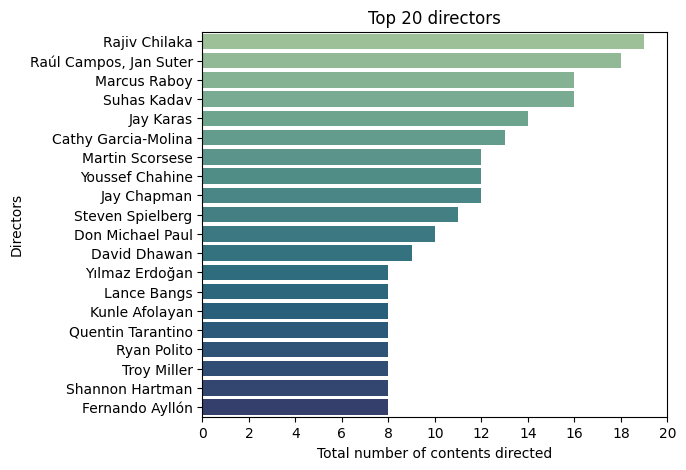

In [296]:
#visualizing the top 20 directors in a barplot
fig = plt.figure(figsize=(6,5)) #setting the figure size
sns.barplot(x = top20_dirs.values,
            y = top20_dirs.index, 
            palette = 'crest',
            )
plt.xlabel('Total number of contents directed')
plt.ylabel('Directors')
plt.title('Top 20 directors')
plt.xticks(range(0,max(top20_dirs)+2,2))

plt.show()


### Most appearing Actors/Actresses

In [331]:
#printing values of cast for top 5 rows
df['cast'].head()

0                                                  NaN
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                  NaN
4    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
Name: cast, dtype: object

Since there are multiple cast members in a TV show or a movie, we will collect all of them in a single collection and find out the count for each.

In [542]:
def combine_and_count_values(data, data_name, top = None):
    # Parameters --> data: column of dataframe, 
    #                data_name: string for name of data, 
    #                top: int if top n numbers needed
    # Returns a dataframe with sorted values by its count

    
    ##combine all the non null values from the data
    data = [d for d in data if not pd.isna(d)]

    #join all the strings into one
    collection = ','.join(data)
    
    #separate them to a list
    list_collection = [c.strip() for c in collection.split(',')]

    #use counter library to get the counts and put them in dataframe
    counter = Counter(list_collection)

    #transpose to get desired output
    df = pd.DataFrame([list(counter.keys()),list(counter.values())]).T
    #setting the name of columns
    df.columns = [data_name,'Count']
    
    if top:
        return df.sort_values('Count', ascending = False, ignore_index = True).head(top) #returns top n elements
    else:
        return df.sort_values('Count', ascending = False,ignore_index = True) # returns all elements

Lets find out top 20 most appearing actors or actress in disney+

In [543]:
top20_actors = combine_and_count_values(df['cast'], 'Cast Member', top=20)
top20_actors

,Cast Member,Count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Paresh Rawal,28


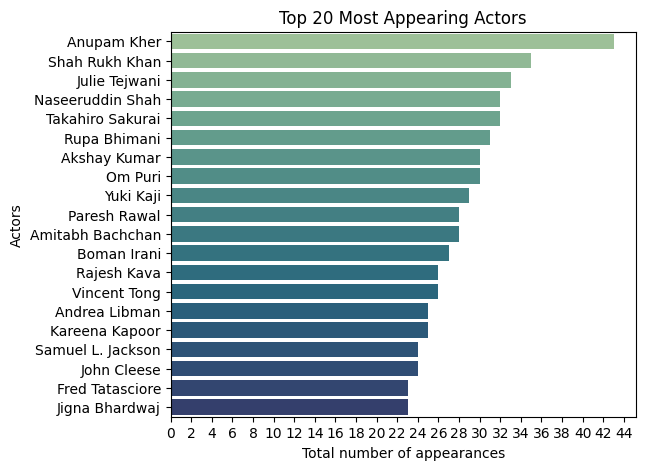

In [544]:
#visualizing the top 20 actors in a barplot
fig = plt.figure(figsize=(6,5)) #setting the figure size
sns.barplot(x = top20_actors['Count'],
            y = top20_actors['Cast Member'], 
            palette = 'crest',
            )
plt.xlabel('Total number of appearances')
plt.ylabel('Actors')
plt.title('Top 20 Most Appearing Actors')
plt.xticks(range(0,max(top20_actors.Count)+2,2))

plt.show()

### Largest producer Country

In [545]:
## Distribution of country
df['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

Let's use the same method as above to find the count as some of the contents were created in multiple countries

In [546]:
country_data = combine_and_count_values(df['country'], 'Country')
country_data

,Country,Count
0,United States,3690
1,India,1046
2,United Kingdom,806
3,Canada,445
4,France,393
...,...,...
118,Ecuador,1
119,Armenia,1
120,Mongolia,1
121,Bahamas,1


We can use choropleth to visualize this in a world map.

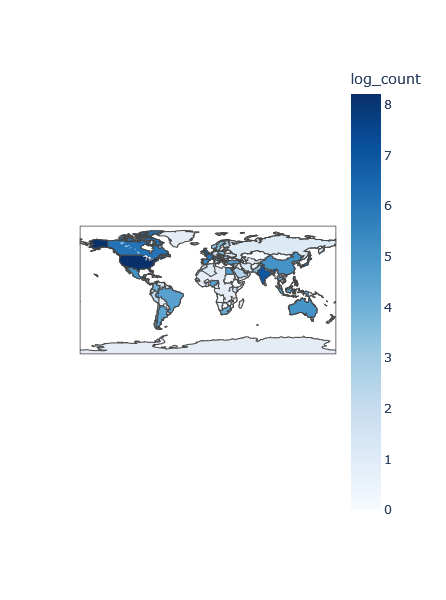

In [564]:
import math
def create_map(country_data):
    country_data['log_count'] = [math.log(count) for count in country_data['Count']]
    fig = px.choropleth(country_data, locations='Country',
                        locationmode='country names',
                        color= 'log_count', #use log to color as the difference between counts are significant
                        color_continuous_scale= px.colors.sequential.Blues,
                        custom_data=['Country', 'Count']
                       )
    
    fig.update_traces(hovertemplate='<b>%{customdata[0]}</b><br>Count: %{customdata[1]}')
    # update layout figure method
    fig.update_layout(
        title_text='',
        width=1200,
        height=600,
    )
    
    fig.show()
create_map(country_data)

Lets also visualize this in pie chart where only top 10 are shown distinctly.

In [548]:
top_10_countries = country_data[['Country','Count']].head(10)
others = pd.DataFrame([['Others',np.sum(country_data[10:]['Count'])]], columns = ['Country','Count'])
top_countries = pd.concat((top_10_countries,others), axis=0)
top_countries

,Country,Count
0,United States,3690
1,India,1046
2,United Kingdom,806
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


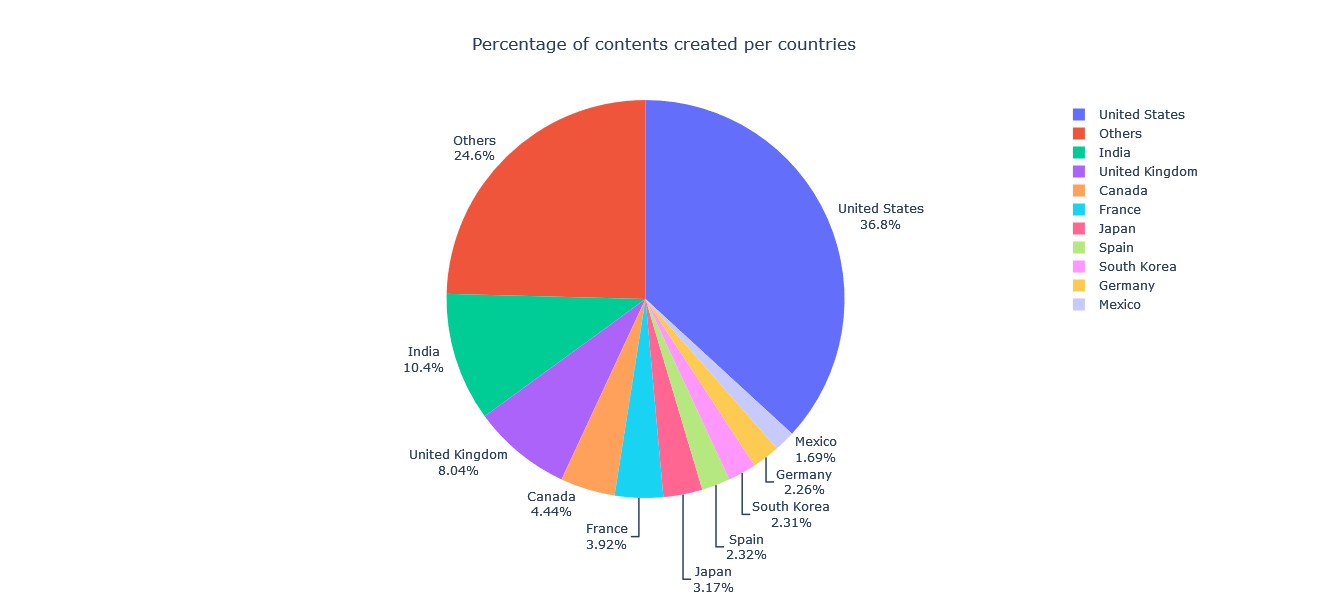

In [549]:
fig = px.pie(top_countries, values='Count', names='Country',         
             hover_data=['Count'], 
             labels={'Country':'Country'},
             title= 'Percentage of contents created per countries',
             height=600,
             width=1200)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title={'x':0.5, 'xanchor': 'center'})
fig.show()

### Content Difference according to the countries

Since USA makes more than 30 percent of the contents available in disney+, it would not be wise to check which country makes most contents for a genre as it would be USA most of the times. So instead, we will find out which content type, rating type and genre is mostly created in a country.

In [592]:
def category_per_country(cat):
    # splitting the data with , as some have multiple values and convert them in a list
    c_df = df['country'].apply(lambda x: [s.strip() for s in x.split(',')] if isinstance(x,str) else x)
    
    # explode creates a new record for each of the data in the list and to frame is to convert it into dataframe
    c_df = c_df.explode().to_frame()

    # create a new column cat where each country gets its value as per the index form original dataframe
    c_df[cat] = c_df.apply(lambda x:df[cat][x.index])

    # create a final table to create dummy variable for each value in table and calculate the count of each cat
    final = c_df.pivot_table(index='country', columns=cat, aggfunc='size', fill_value=0)

    #temp total column to sort the table
    final['total'] = final.sum(axis = 1)
    return final.sort_values('total', ascending = False).drop(columns =['total'])

type_dist = category_per_country('type')
top_10_countries = type_dist.head(10)
top_10_countries.reset_index(inplace = True)
top_10_countries

type,country,Movie,TV Show
0,United States,2752,938
1,India,962,84
2,United Kingdom,534,272
3,Canada,319,126
4,France,303,90
5,Japan,119,199
6,Spain,171,61
7,South Korea,61,170
8,Germany,182,44
9,Mexico,111,58


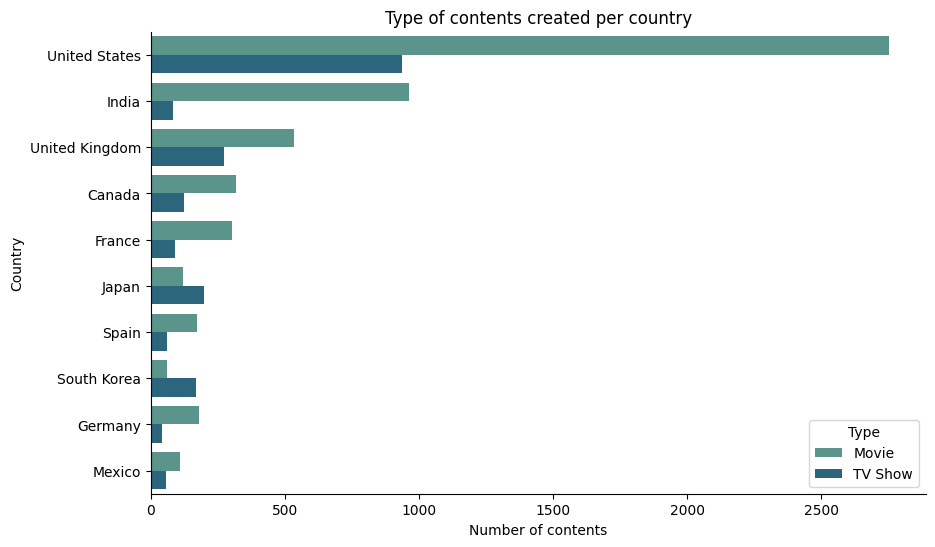

In [630]:
# top_10_countries.plot(x='country'.index, y=["Movie", "TV Show"], kind="bar") 
fig, ax1 = plt.subplots(figsize=(10, 6))
tidy = top_10_countries.melt(id_vars='country').rename(columns=str.title)
sns.barplot(y='Country', x='Value', hue='Type', data=tidy, ax=ax1, palette= 'crest')
ax1.set_xlabel('Number of contents')
ax1.set_title('Type of contents created per country')
sns.despine(fig)

In [665]:
rating_dist = category_per_country('rating')
rating_dist

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country,,,,,,,,,,,,,,
United States,39,1,43,243,433,660,497,89,1101,304,127,147,2,1
India,0,0,7,7,11,5,572,10,266,144,6,17,1,0
United Kingdom,4,0,12,35,84,145,103,25,253,98,34,12,0,1
Canada,2,1,5,33,32,79,49,17,107,39,45,35,1,0
France,2,1,4,21,35,57,48,6,163,12,21,21,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jamaica,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Slovakia,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Nicaragua,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Index(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
      dtype='object', name='rating')


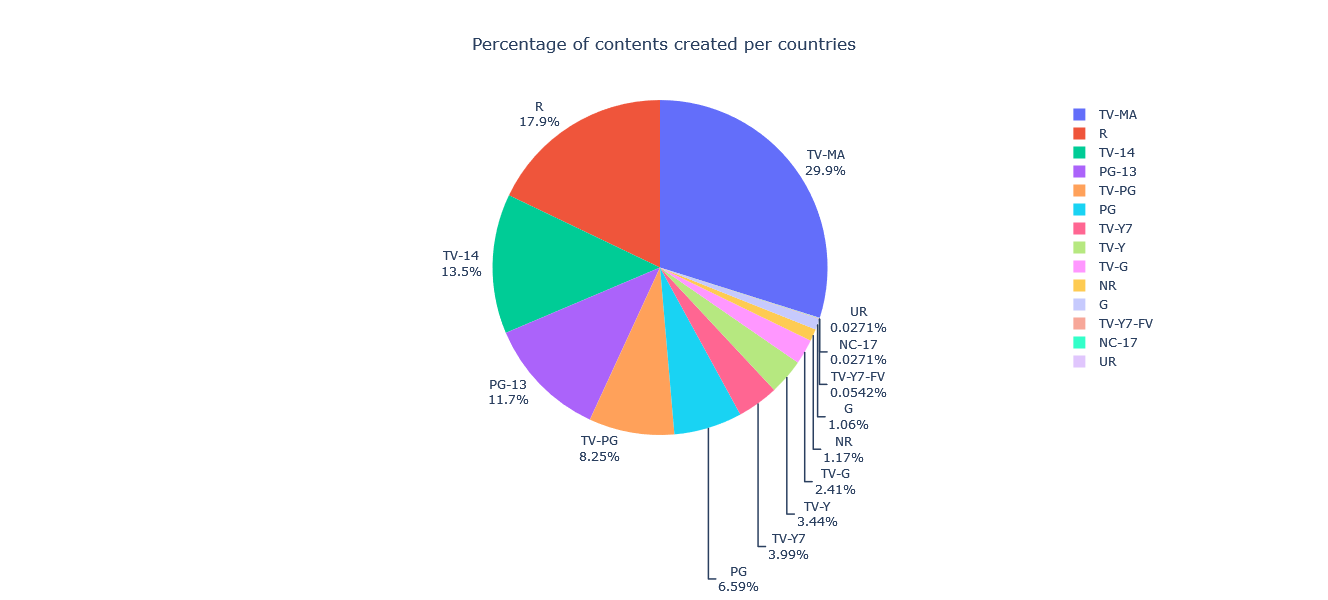

Index(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
      dtype='object', name='rating')


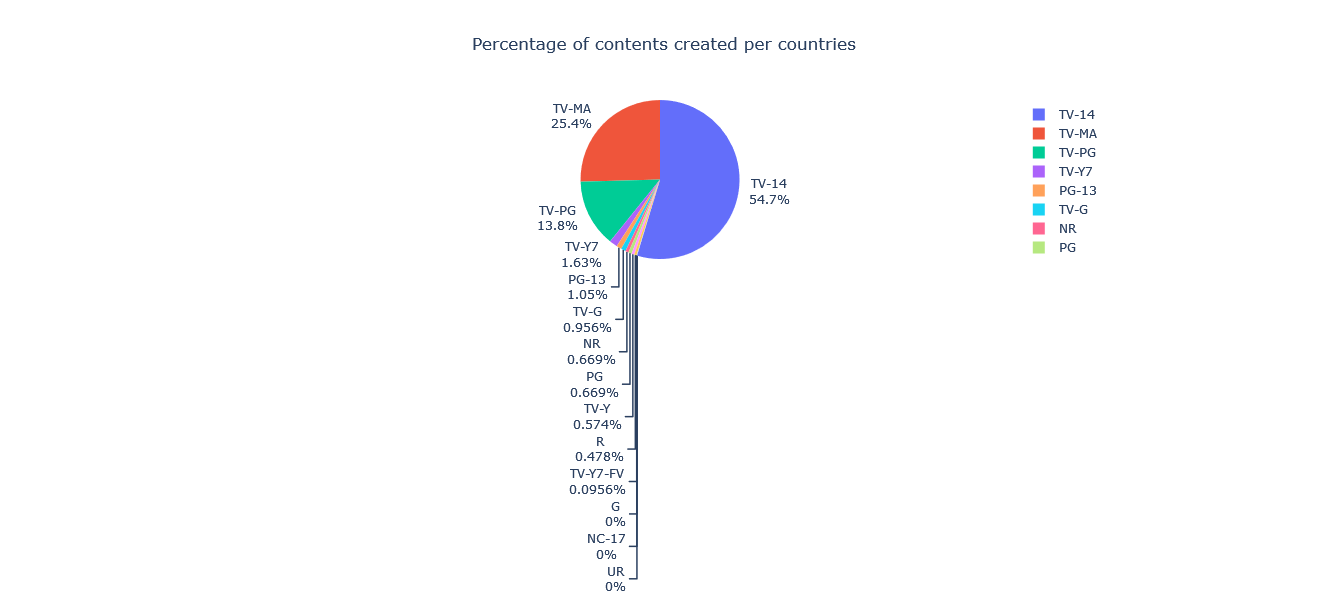

Index(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
      dtype='object', name='rating')


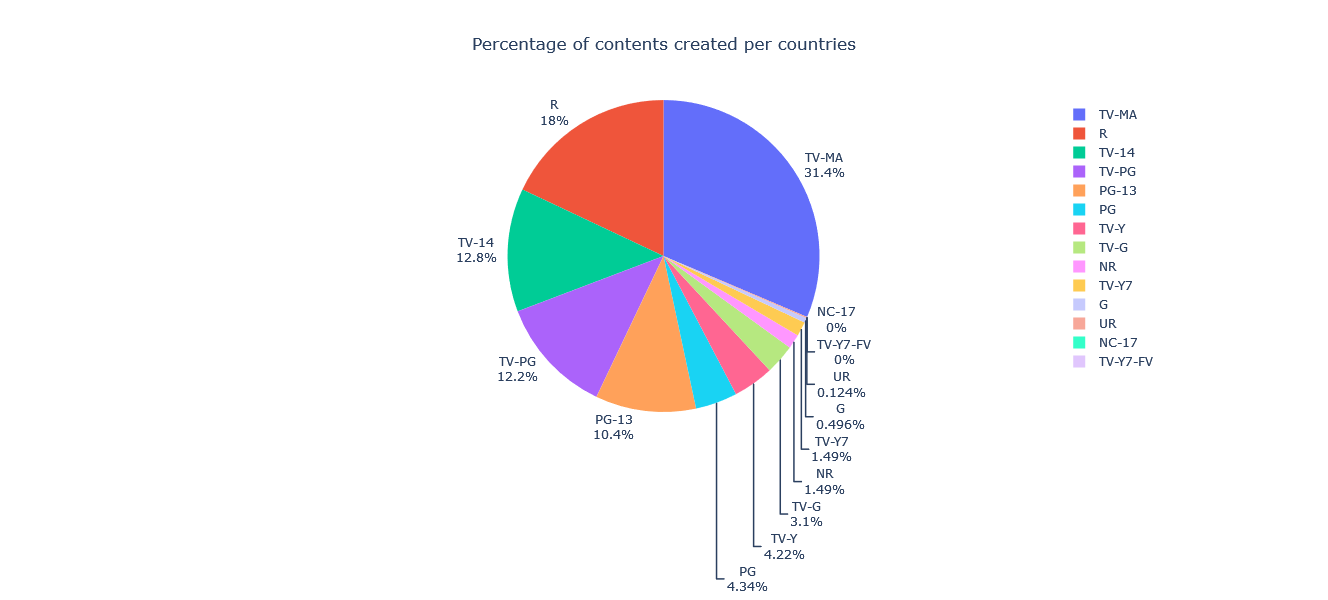

Index(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
      dtype='object', name='rating')


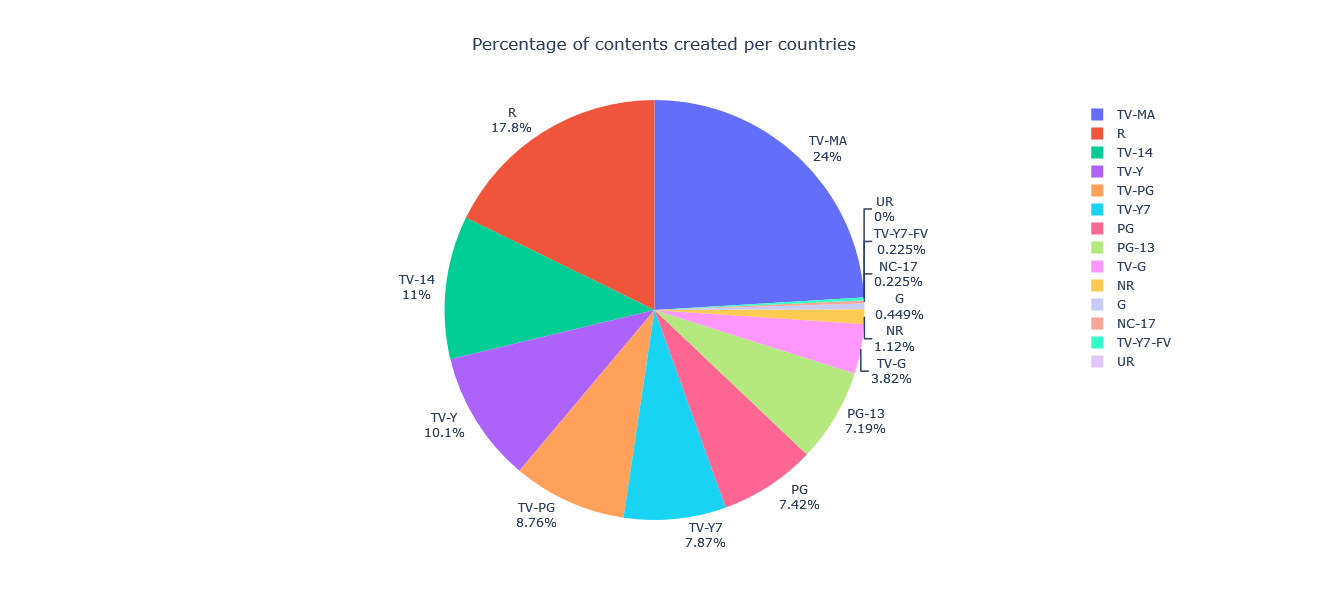

Index(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
      dtype='object', name='rating')


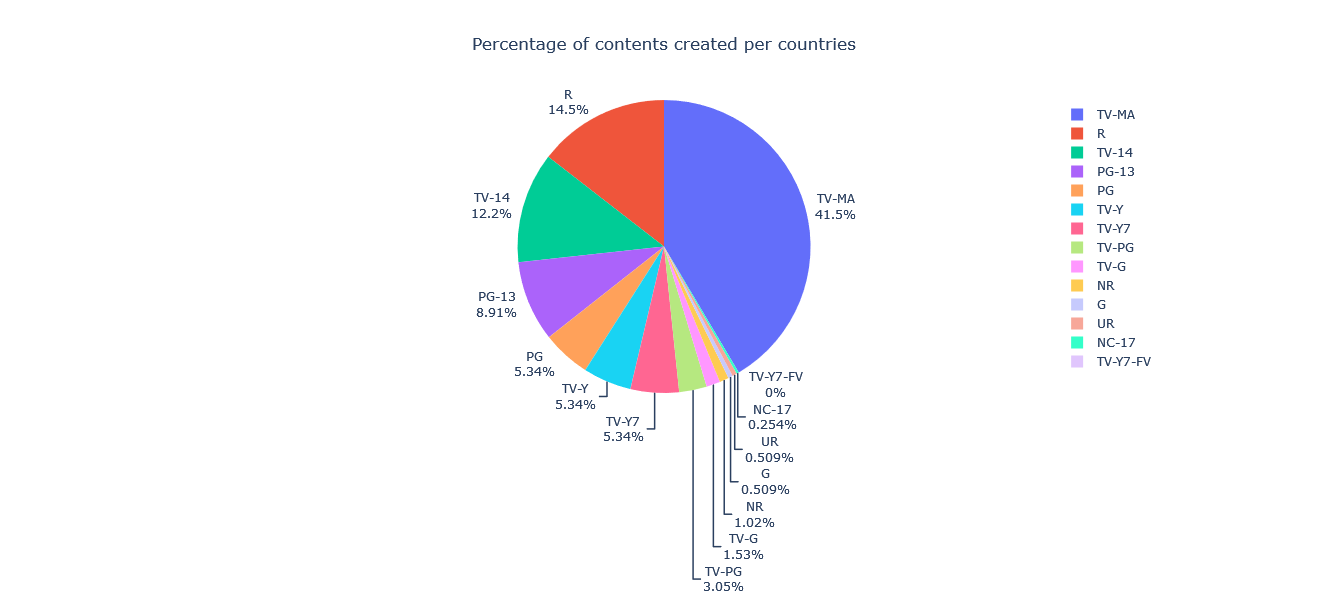

Index(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
      dtype='object', name='rating')


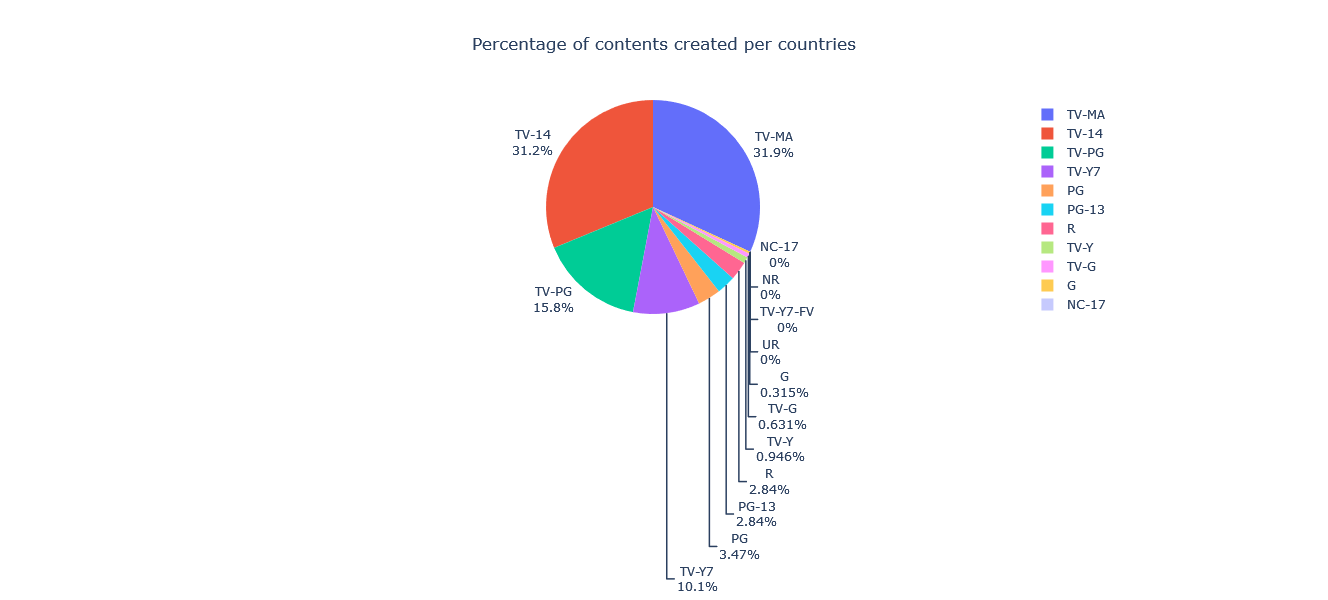

Index(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
      dtype='object', name='rating')


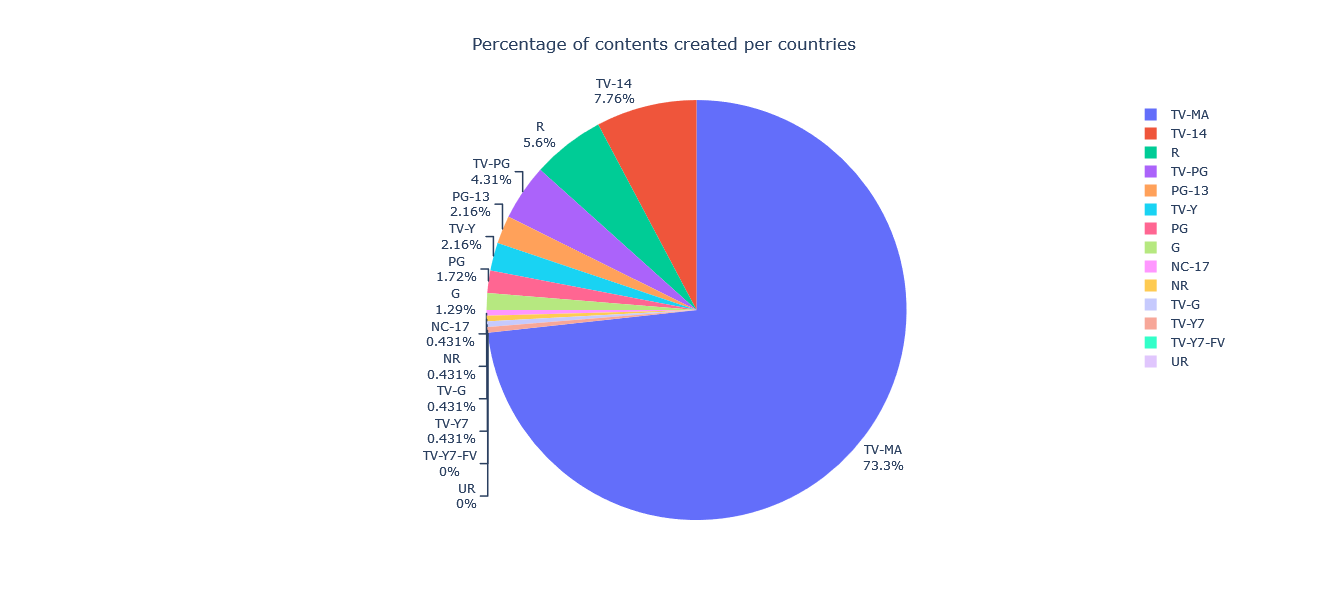

Index(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
      dtype='object', name='rating')


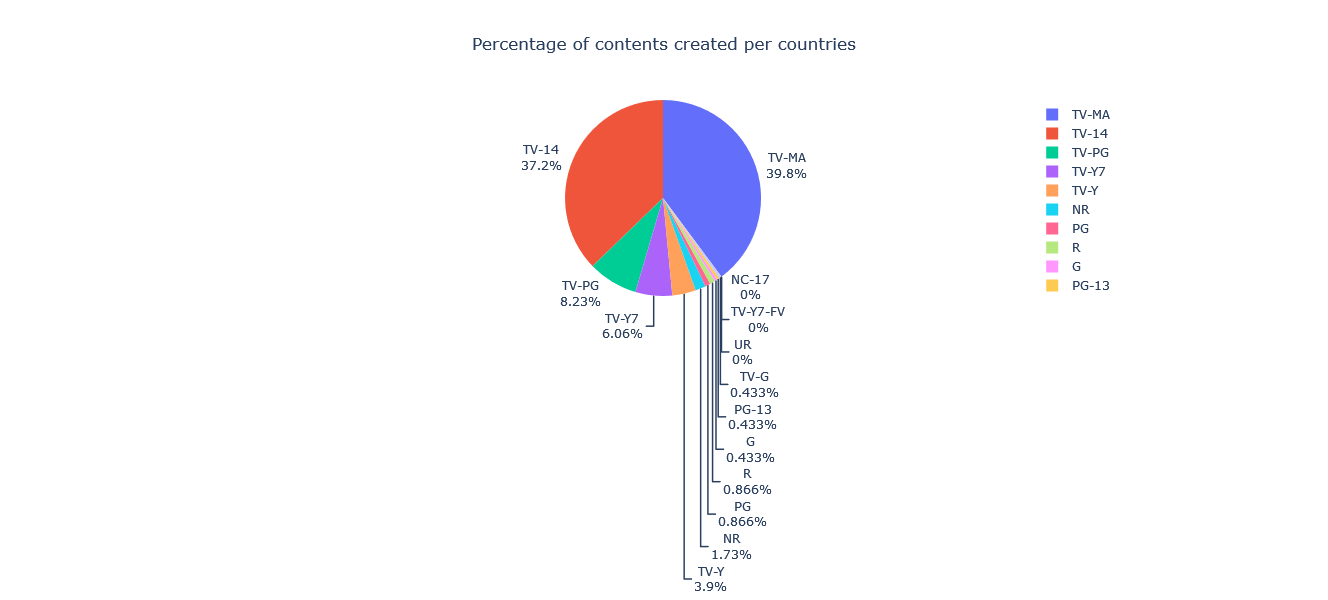

Index(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
      dtype='object', name='rating')


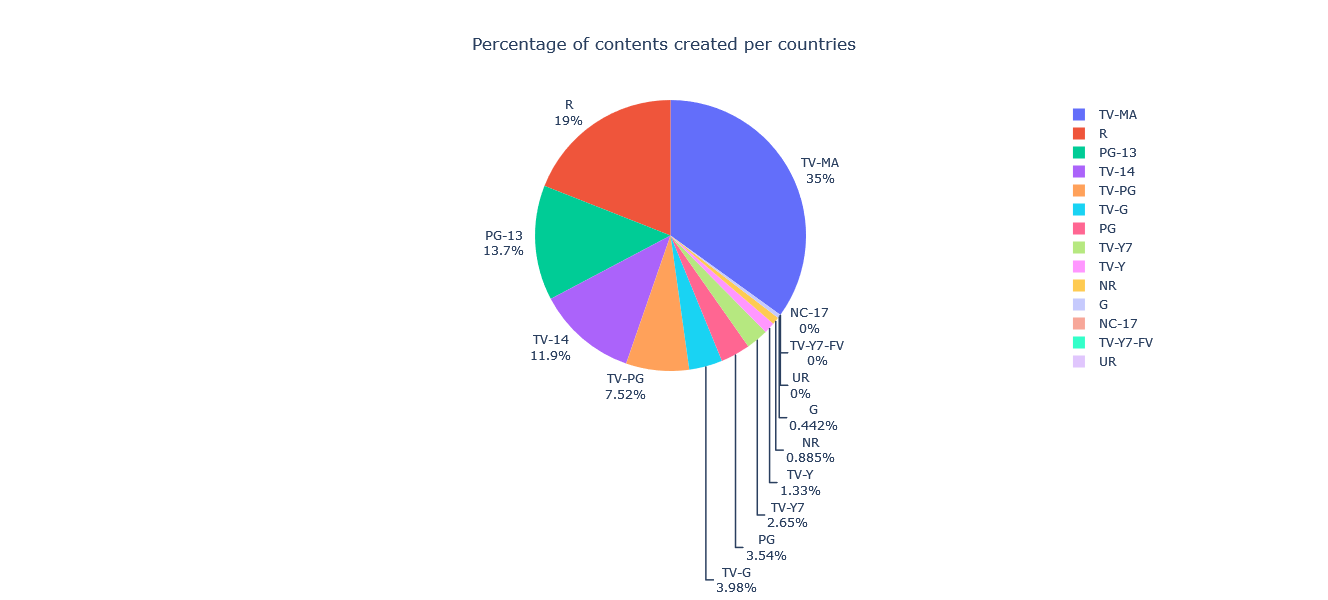

Index(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
      dtype='object', name='rating')


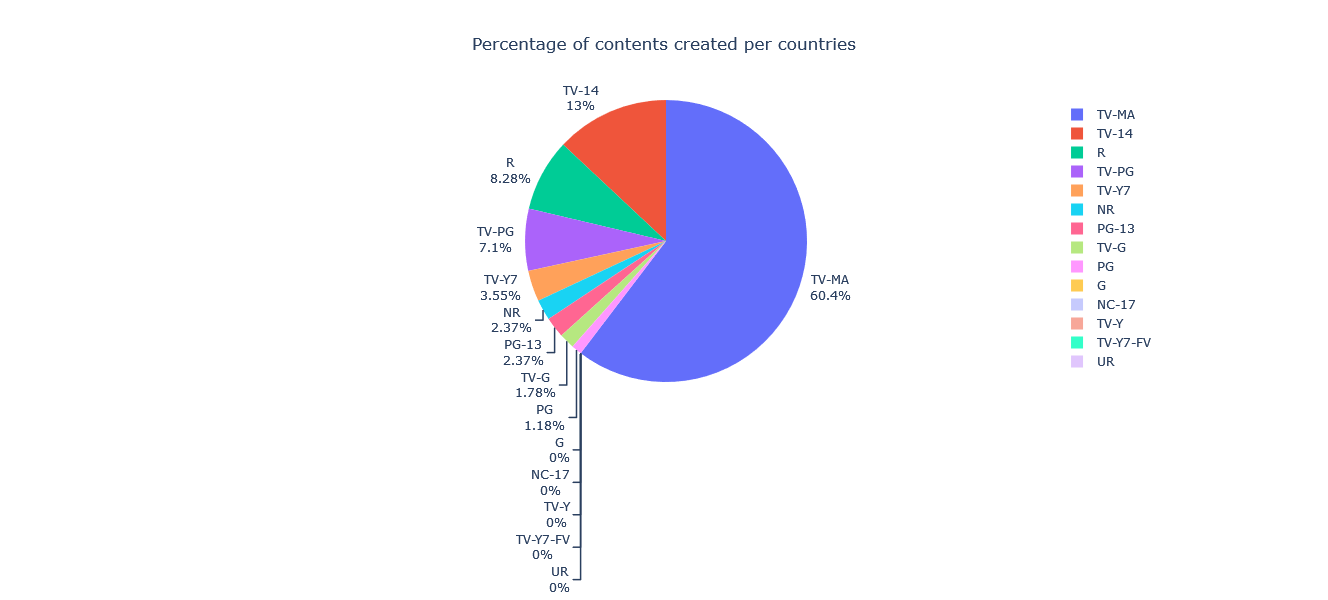

In [682]:
for i,country in rating_dist.head(10).iterrows():
    print(country.index)
    fig = px.pie(country.index, values=country.values,names = country.index, 
                 labels={'Country':'Country'},
                 title= 'Percentage of contents created per countries',
                 height=600,
                 width=1200)
    fig.update_traces(textposition='outside', textinfo='percent+label')
    fig.update_layout(title={'x':0.5, 'xanchor': 'center'})
    fig.show()

### Type over the years
Over the year, different contents were added. since disney+ is a fairly new platform, the contents should be mostly added during the last 5 years. 

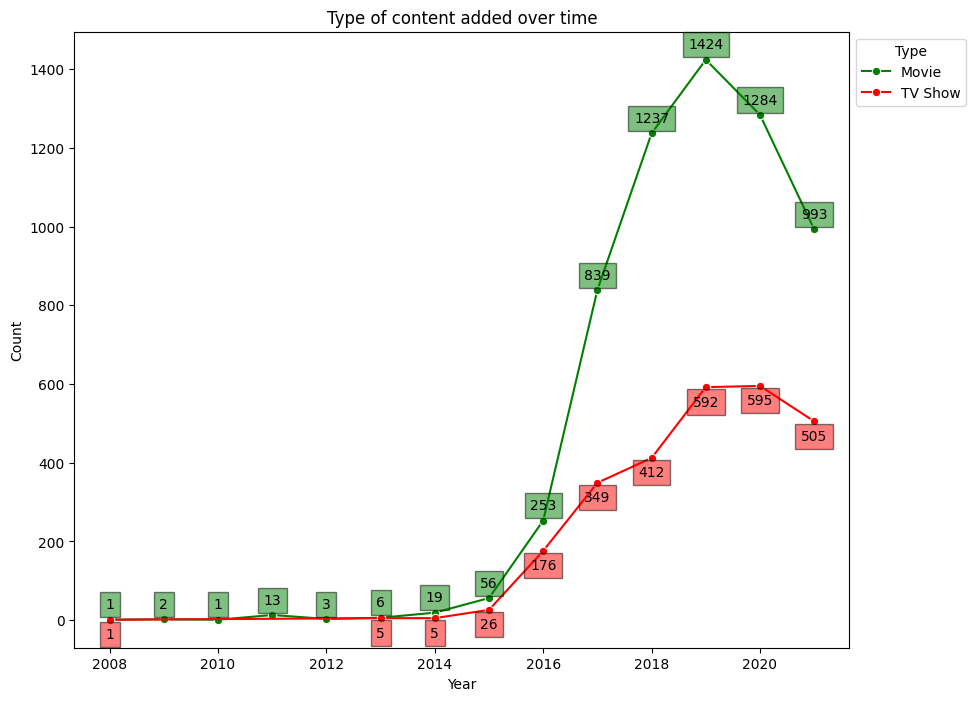

In [454]:
va=['top','bottom']
color = ['red','green']
margin = [-20,20]
plt.figure(figsize=(10,8))
for t in df['type'].unique():
    a = df[df['type']==t]
    #grouping by just the year of the date added
    year_group = a.groupby(df['date_added'].map(lambda x: x.year))['show_id'].count()
    color_ = color.pop()
    va_ = va.pop()
    margin_ = margin.pop()
    sns.lineplot(x = year_group.index,
                 y = year_group.values,
                 label = t,
                 color = color_, 
                 marker = 'o')
    
    for x, y in zip(year_group.index,year_group.values):
        plt.text(x,
                 y+margin_,
                 y,
                 horizontalalignment='center',
                 verticalalignment=va_,
                 bbox=dict(facecolor=color_, alpha = 0.5)) #some decorations
# Add labels and title
plt.title('Type of content added over time')
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

It is observed that the trend of adding movies and TV Shoe both declined sharply in the later years, which might be due to the pandemic which started in 2019.

### Popular Word Choices

#### Popular word choices for the title of the contents
To find the populating of a text snippet we can use word cloud which accumulates all the word and creates a word collection whose size is propertionate to the number of time it hads been used.

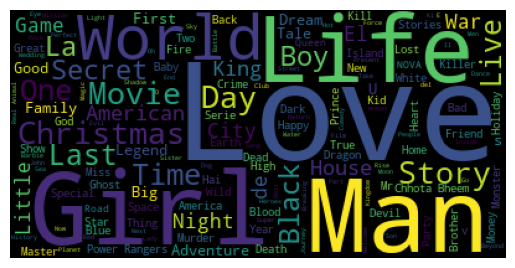

In [232]:
titles = df['title']
# Create and generate a word cloud image:
title_wordcloud = WordCloud().generate(' '.join(titles))

# Display the generated image:
plt.imshow(title_wordcloud)
plt.axis("off")
plt.show()


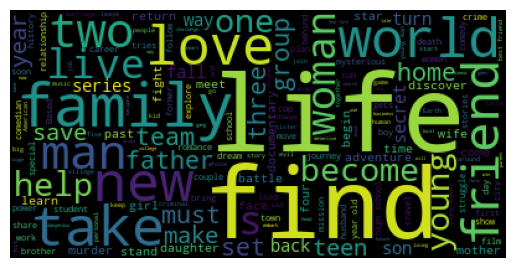

In [233]:
desc = df['description']
# Create and generate a word cloud image:
desc_wordcloud = WordCloud().generate(' '.join(desc))

# Display the generated image:
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.show()

In [234]:
df['date_added'] = df['date_added'].apply(pd.to_datetime)

In [235]:
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [238]:
last_date = max(df['date_added'])
last_date

Timestamp('2021-09-25 00:00:00')

In [242]:
last_year_data = df[df['date_added'] > last_date - pd.Timedelta(days = 365)]
last_year_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


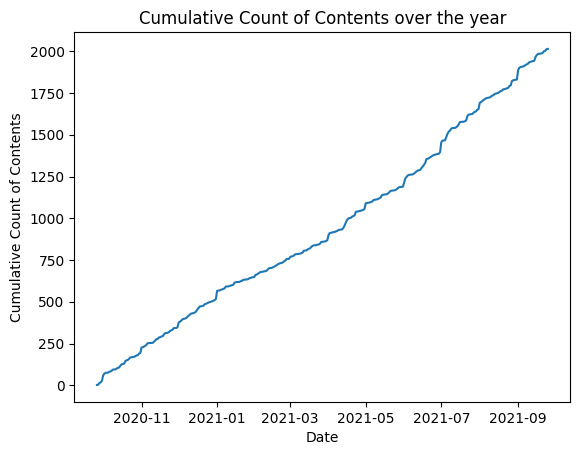

In [248]:
day_group = last_year_data.groupby('date_added')['show_id'].count()
# Calculating cumulative sum
cumulative_sum = day_group.cumsum()

# Plotting the cumulative sum
sns.lineplot(x=day_group.index, y=cumulative_sum)
plt.xlabel('Date')
plt.ylabel('Cumulative Count of Contents')
plt.title('Cumulative Count of Contents over the year')
plt.show()

In [250]:
second_last_year_data = df[(df['date_added'] < last_date - pd.Timedelta(days = 365)) & (df['date_added'] > last_date - pd.Timedelta(days = 2*365))]
second_last_year_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1957,s1958,Movie,Real Steel,Shawn Levy,"Hugh Jackman, Dakota Goyo, Evangeline Lilly, A...","United States, India",2020-09-24,2011,PG-13,127 min,"Action & Adventure, Sci-Fi & Fantasy, Sports M...",A struggling fighter-turned-promoter reconnect...
1958,s1959,TV Show,The Chef Show,NaN,"Jon Favreau, Roy Choi",United States,2020-09-24,2020,TV-MA,4 Seasons,Docuseries,"Writer, director and food enthusiast Jon Favre..."
1959,s1960,Movie,Enola Holmes,Harry Bradbeer,"Millie Bobby Brown, Henry Cavill, Sam Claflin,...",United Kingdom,2020-09-23,2020,PG-13,124 min,"Action & Adventure, Children & Family Movies, ...","While searching for her missing mother, intrep..."
1960,s1961,Movie,Kiss the Ground,"Joshua Tickell, Rebecca Harrell Tickell",Woody Harrelson,United States,2020-09-22,2020,TV-G,85 min,Documentaries,Science experts and celebrity activists unpack...
1961,s1962,TV Show,The Playbook,NaN,NaN,United States,2020-09-22,2020,TV-MA,1 Season,Docuseries,Coaches with championship résumés share their ...


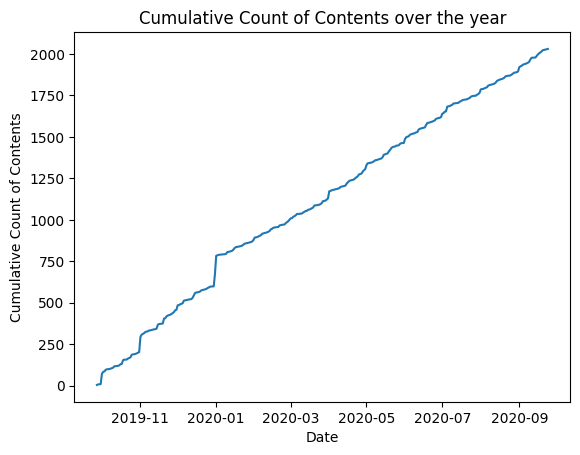

In [251]:
day_group = second_last_year_data.groupby('date_added')['show_id'].count()
# Calculating cumulative sum
cumulative_sum = day_group.cumsum()

# Plotting the cumulative sum
sns.lineplot(x=day_group.index, y=cumulative_sum)
plt.xlabel('Date')
plt.ylabel('Cumulative Count of Contents')
plt.title('Cumulative Count of Contents over the year')
plt.show()